# Week 5: Introduction to classification methods 

----------------------------------------------------
Machine Learning     Year 2019/2020

*Vanessa Gómez Verdejo vanessa@tsc.uc3m.es* and *Pablo M. Olmos olmos@tsc.uc3m.es*

----------------------------------------------------

In this lab session we are going to go deep in our knowledge about classifiers by introducing the most well-known classification algorithms. Besides, we are going to review some useful techniques, such as the cross validation process, which will allow us to adjust the free parameters of these methods. 

## Classification formulation


Consider we have a **training** database of $N$ entries of the form $(\mathbf{x}^{(i)},y^{(i)})$, where $\mathbf{x}\in\mathbb{R}^D$ is a sample and $y$  is its associated label. As we are working with classification problem, the label $y$ only belongs to **two possible categories**, $y\in\{0,1\}$, in binary problems or to **M categories**, $y\in\{0,1, \ldots, M-1\}$,  in multiclass scenarios. 

Our goal in classification is to propose a hipothesis function $h(\mathbf{x},y)$ that will be used to estimate the most likely class of a new point $\mathbf{x}^*$ as follows

\begin{align}
\hat{y}^* =  {\arg \max}_{y\in\{0,1,\ldots, M-1\}} h(\mathbf{x}^*,y)
\end{align}

In case the classifier output matches the real target value ($\hat{y}^*=y^*$) there is a hit, otherwise ($\hat{y}^*\neq y^*$) the decision is an error. So, in the ideal case the classifier desing should be aimed to optimize a loss or cost function that minimize the averaged number of missclassified patterns (**classification error, CE**), 
$$ CE = \frac{1}{N}\sum_{i=1}^N \mathbb{I}[y^{(i)}\neq \hat{y}^{(i)}] $$
where $\mathbb{I}[\cdot]$ is the indicator function that takes value $1$ if the condition within the brakets is met, and zero otherwise.


However, as we will see later, the minimization of this cost function is usually not simple (or feasible) and ML techniques prefer to minimize any  upperbound of the classification error. 





In other cases, the classifier design resorts to **Bayesian decision theory**, where it is known that the decisor with minimum probability of error  is given by the MAP (Maximum a Posteriori) decision maker:
\begin{align}
\hat{y}^* =  {\arg \min}_{y\in\{0,1,\ldots, M-1\}} P(Y \neq y|\mathbf{x}^*) = {\arg \max}_{y\in\{0,1,\ldots, M-1\}} P(Y = y|\mathbf{x}^*) 
\end{align}

being $P(Y=y|\mathbf{x}^*)$ the posterior probability of class $y$. So, these classifiers firstly estimates the posterior probabilities of each class in order to be able to apply the previous decision criterion.


## Load and prepare the data

For this lab session, lest's work over the [Iris data set](https://scikit-learn.org/stable/datasets/index.html#iris-plants-dataset) which consists of 150 patterns corresponding to 3 different types of irises: Setosa, Versicolour, and Virginica. Each pattern contains the sepal and petal lengths and widths. Despite having four input features, for display purposes, we are going to start working with the two features: sepal width (feature 1) and petal width (feature 3). 

For prepare the data, next code cell let you:
* Load the dataset
* Create training and testing partitions with the 60% and 40% of the original data
* Normalize the data to zero mean and unitary standard deviation 


In [0]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Initialize the random generator seed to compare results
np.random.seed(0)

# Load Iris data set
iris = datasets.load_iris()
sel_feat = [1, 3]
X = iris.data[:,sel_feat]  # we only take features 1 and 3.
Y = iris.target

# Create data partitions
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.4)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 1. K-NN Classifier

In this introduction to classifier methods, let's start with a **nonparametric** classifier: The K-NN classifier. This classifier is actually very similar to the K-NN regressor, since it merely replaces the average nearest neighbour value by a majority voting scheme. 

Given a new point $\mathbf{x}^*$, the predicted label is obtained as

\begin{align}
\hat{y}^* =  {\arg \max}_{y\in\{0,1,\ldots, M-1\}} h(\mathbf{x}^*,y)
\end{align}

where the hipothesis function, $h(\mathbf{x},y)$, is given by:

\begin{align}
h(\mathbf{x}^*,y) = \frac{1}{K}\sum_{k\in \mathcal{S}_{K}(\mathbf{x}^*)} \mathbb{I}[y^{(k)}==y],
\end{align}

where $\mathbb{I}[\cdot]$ is the indicator function that takes value $1$ if the condition within the brakets is met, and zero otherwise. Also, $\mathcal{S}_{K}$ is the set of the **$K$ training points that are closest to $\mathbf{x}^*$ according to a given distance metric $d(\mathbf{x}^{(i)},\mathbf{x}^*)$**. For instance, in real spaces the most common choice is the **euclidean distance**:

\begin{align}
d(\mathbf{x}^{(i)},\mathbf{x}^*) = \left|\left|\mathbf{x}^{(i)}-\mathbf{x}^*\right|\right|^2
\end{align}

As the regression version, we can find many variants of the above expression; for instance, we can **weight differently the indicator terms according to the distance**. 

Note that $h(\mathbf{x},y)$ is approximating the posterior probability of each class, $P(Y=y|\mathbf{x}^*)$, by averaging the number of neigbours that are belonging to each class. So the final classification criteria is a MAP decisor:
\begin{align}
y* = {\arg \max}_{y\in\{0,1,\ldots, M-1\}} P(Y=y|\mathbf{x}^*) 
\end{align}


### Exercise 1

Analize the K-NN performance:
1. For a range of K values from 1 to 20 analyze the train and test performance (accuracy$^1$). 
2. Select the optimum value of K using a 10-fold CV.
3. Compute the test accuracy for the optimum value of K.
4. Plot the classification boundary.


(1) In classification problems, the performance is ussually evaluated either in terms of the classfication error (CE) rate or the **accuracy** (average number of hits):

$$ CE = \frac{1}{N}\sum_{i=1}^N \mathbb{I}[y^{(i)}\neq \hat{y}^{(i)}] $$

$$ Acc =  1- CE = \frac{1}{N}\sum_{i=1}^N \mathbb{I}[y^{(i)}= \hat{y}^{(i)}] $$

You can use the [*sklearn K-NN classifier implementation*](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) toghether to its score() method (which computes the classifier accuracy), as well as the [GridSearchCV( )](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) function to complete this exercise. Besides, next cell provides you the function plot_boundary(), which can help you to plot the classification boundary.

In [0]:
# Plot the decision boundary
import matplotlib.pyplot as plt

def plot_boundary(clf, X, Y, plt):
    """Plot the classification regions for a given classifier.

    Args:
        clf: scikit-learn classifier object.
        X (numpy dnarray): training or test data to be plotted (number data x number dimensions). Only first two dimensions are plotted
        Y (numpy dnarray): labels of the training or test data to be plotted (number data x 1).
        plt: graphic object where you wish to plot                                             
   
    """

    plot_colors = "brymc"
    plot_step = 0.02
    n_classes = np.unique(Y).shape[0]
    # Plot the decision regions
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired)

    plt.axis("tight")

#### SOLUTION 1

In [0]:
# <SOL>

from sklearn import neighbors

K_max=20
rang_K = np.arange(1, K_max+1)
vect_tr=[]
vect_test=[]

for n_neighbors in rang_K:
    # Create a KNN classifier, train it and compute training and error accuracies.
    clf = neighbors.KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, Y_train)
    acc_tr = clf.score(X_train, Y_train)
    acc_test=clf.score(X_test,Y_test)
    
    # Saving accuracies in a list
    vect_tr.append(acc_tr)
    vect_test.append(acc_test)

    print("For K = %d, train accuracy is %2.2f%% and test accuracy is %2.2f%%"
          % (n_neighbors, 100*acc_tr, 100*acc_test))

# </SOL>

For K = 1, train accuracy is 98.89% and test accuracy is 86.67%
For K = 2, train accuracy is 97.78% and test accuracy is 90.00%
For K = 3, train accuracy is 96.67% and test accuracy is 91.67%
For K = 4, train accuracy is 96.67% and test accuracy is 91.67%
For K = 5, train accuracy is 95.56% and test accuracy is 93.33%
For K = 6, train accuracy is 95.56% and test accuracy is 93.33%
For K = 7, train accuracy is 95.56% and test accuracy is 93.33%
For K = 8, train accuracy is 96.67% and test accuracy is 93.33%
For K = 9, train accuracy is 95.56% and test accuracy is 93.33%
For K = 10, train accuracy is 95.56% and test accuracy is 93.33%
For K = 11, train accuracy is 95.56% and test accuracy is 91.67%
For K = 12, train accuracy is 96.67% and test accuracy is 93.33%
For K = 13, train accuracy is 95.56% and test accuracy is 93.33%
For K = 14, train accuracy is 96.67% and test accuracy is 93.33%
For K = 15, train accuracy is 94.44% and test accuracy is 93.33%
For K = 16, train accuracy is 95.5

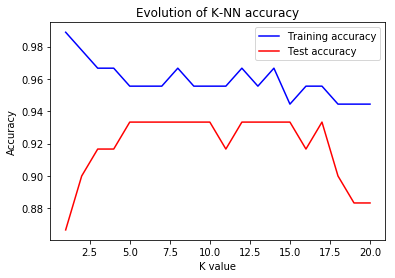

In [0]:
# <SOL>

#Plot acc vs K
import matplotlib.pyplot as plt

plt.figure()
plt.plot(rang_K,vect_tr,'b', label='Training accuracy')
plt.plot(rang_K,vect_test,'r', label='Test accuracy')
plt.legend()
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.title('Evolution of K-NN accuracy')
plt.show()

# </SOL>

#### SOLUTION 2

In [0]:
# <SOL>

from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

# Parameters
K_max = 20
rang_K = np.arange(1, K_max+1)
nfold = 10
# Define a dictionary with the name of the parameters to explore as a key and the ranges to explores as value
tuned_parameters = [{'n_neighbors': rang_K}]

# Cross validation proccess <FILL IN>
clf_base = neighbors.KNeighborsClassifier( )
# Define the classifier with the CV process (use GridSearchCV here!!!)
clf = GridSearchCV(clf_base, tuned_parameters, cv=nfold, iid= True)
# Train it (this executes the CV)
clf.fit(X_train, Y_train)

print('CV process sucessfully finished')

# </SOL>

CV process sucessfully finished


Cross validation results:
For K = 1, validation accuracy is 94.44 (+/-2.736)%
For K = 2, validation accuracy is 92.22 (+/-2.373)%
For K = 3, validation accuracy is 95.56 (+/-2.679)%
For K = 4, validation accuracy is 94.44 (+/-2.736)%
For K = 5, validation accuracy is 95.56 (+/-2.736)%
For K = 6, validation accuracy is 96.67 (+/-2.561)%
For K = 7, validation accuracy is 95.56 (+/-2.679)%
For K = 8, validation accuracy is 95.56 (+/-2.679)%
For K = 9, validation accuracy is 95.56 (+/-2.679)%
For K = 10, validation accuracy is 95.56 (+/-2.679)%


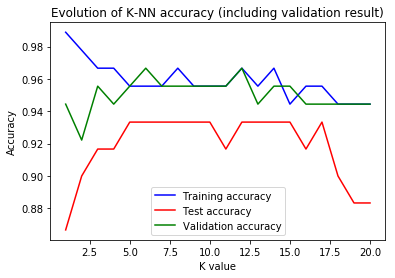

The value optimum of K is 6


In [0]:
# <SOL>

# Printing results
print("Cross validation results:")

paramsFolds = clf.cv_results_['params']
meanScoreFolds = clf.cv_results_['mean_test_score']
stdScoreFolds = clf.cv_results_['std_test_score']

for fold in range(nfold):
    params = paramsFolds[fold]
    mean_score = meanScoreFolds[fold]
    std_score = stdScoreFolds[fold]
    print("For K = %d, validation accuracy is %2.2f (+/-%1.3f)%%" 
          % (params['n_neighbors'], 100*mean_score, 100*std_score / 2))

# Selecting validation error (mean values)
vect_val=meanScoreFolds

# Ploting results
plt.figure()
plt.plot(rang_K,vect_tr,'b', label='Training accuracy')
plt.plot(rang_K,vect_test,'r', label='Test accuracy')
plt.plot(rang_K,vect_val,'g', label='Validation accuracy')
plt.legend()
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.title('Evolution of K-NN accuracy (including validation result)')
plt.show()

# K_opt: the value of K selected by CV
K_opt = clf.best_params_['n_neighbors']
print("The value optimum of K is %d" %(K_opt))

# </SOL>

#### SOLUTION 3

In [0]:
# <SOL>

# Select the final classifier  and compute its test accuracy
KNN_acc_test = clf.best_estimator_.score(X_test, Y_test)
print("The test accuracy is %2.2f" %(100*KNN_acc_test))

# </SOL>

The test accuracy is 93.33


#### SOLUTION 4

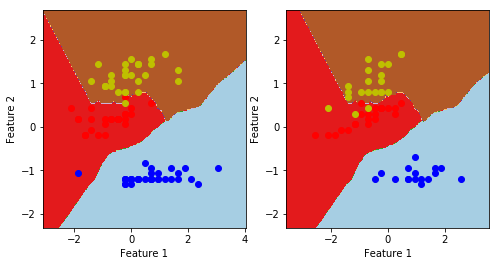

In [0]:
# <SOL>

plt.figure(figsize=(8, 4))
# Plot classification boundary over training data
plt.subplot(1,2,1)
plot_boundary(clf, X_train, Y_train, plt)

# Plot classification boundary over test data
plt.subplot(1,2,2)
plot_boundary(clf, X_test, Y_test, plt)

plt.show()
# </SOL>

## 2. Logistic Regression (LR)

2.1. **The LR model** 

The **logistic regression (LR)** model assumes that the posterior probabilities are given by the following expressions (for the binary case$^1$):

$$P(Y=1| {\bf x}) =\displaystyle \frac{\exp({\bf w}^T {\bf x})}{1+\exp({\bf w}^T {\bf x})} =  \frac{1}{1+\exp(-{\bf w}^T {\bf x})}$$
$$ P(Y=0| {\bf x}) = 1- P(Y=1| {\bf x}) = \frac{1}{1+\exp({\bf w}^T {\bf x})}$$

where the weight vector $\bf w$ will be the classifier parameters to be learnt. 

The definition of these posterior probabilities makes possible to obtain a  **linear classifier**, since the classification boundary of the MAP classifier is linear (this boundary is defined by the points where $P(Y=1| {\bf x})=P(Y=0| {\bf x})$): 
$$\log \frac{P(Y=1| {\bf x})}{P(Y=0| {\bf x})} = {\bf w}^T {\bf x} = 0$$

(1) In the multiclass case, M posterior distributions are defined using $M-1$ weigth vectors and the class $0$ distribution ensures that the sum of all of them is 1. Besides, applying the MAP criterium $M-1$ linear boundaries are obtained.

2.2. **Model Inference**

To learn the value of $\bf w$ (**inference learning**), the LR model maximizes the likelihood of $\bf w$ over the training data, i.e,

$$\bf w^* =  \displaystyle \underset{{\bf w}}{\operatorname{max}} \prod_{i=1}^N p(y^{(i)}|\mathbf{x}^{(i)},\bf w) = \displaystyle \underset{{\bf w}}{\operatorname{max}}  L({\bf w})$$

Taking into account that the probability likelihood of $\bf w$ over the data ${\bf x}$ is $P(Y=1| {\bf x})=\frac{1}{1+\exp(-{\bf w}^T {\bf x})}$ if its label is 1, whereas it is $1- P(Y=1| {\bf x}) $ if it belongs to class $0$; so, the  likelihood over all training data is$^2$:

$$L({\bf w}) = \prod_{i=1}^N P(Y=1| {\bf x}^{(i)})^{y^{(i)}}\left(1- P(Y=1| {\bf x}^{(i)}) \right)^{1-y^{(i)}} $$

and, then, the log-likelihood for N observations is:

$$l({\bf w}) =\log{L({\bf w})} = \sum_{i=1}^N \left\lbrace  y^{(i)}\log \left(  P(Y=1| {\bf x}^{(i)})\right)  + (1-y^{(i)}) \log\left(  1- P(Y=1| {\bf x}^{(i)}) \right)  \right\rbrace   $$
$$l({\bf w}) = \sum_{i=1}^N \left\lbrace  y^{(i)} ({\bf w}^T {\bf x}^{(i)}) - \log \left( 1+ \exp({\bf w}^T {\bf x}^{(i)})\right) \right\rbrace   $$

So, the optimal value of $\bf w$ can be found as the solution of the following optimization problem:
$$\bf w^* =\displaystyle \underset{{\bf w}}{\operatorname{min}}\sum_{i=1}^N \left\lbrace   \log \left( 1+ \exp({\bf w}^T {\bf x}^{(i)})\right) \right\rbrace  -y^{(i)} ({\bf w}^T {\bf x}^{(i)}) $$  


As this cost function has not a closed form, gradient descent algorithms or the Newton method are usually used to find its minimum.

(2) In the multiclass case, the overall likelihood is defined using the multinomial distribution instead of the binomial one.

**References**

T. Hastie, R. Tibshirani and J. Friedman. “Elements of Statistical Learning”. Chapter 4: ``Linear Methods for Classification''. Springer, 2009.




**Cost funcion analysis**

This cost function,
$$\bf w^* =\displaystyle \underset{{\bf w}}{\operatorname{min}}\sum_{i=1}^N \left\lbrace   \log \left( 1+ \exp({\bf w}^T {\bf x}^{(i)})\right) \right\rbrace  -y^{(i)} ({\bf w}^T {\bf x}^{(i)}) $$  
known a binomial deviance, is un upper bound of the classification error.

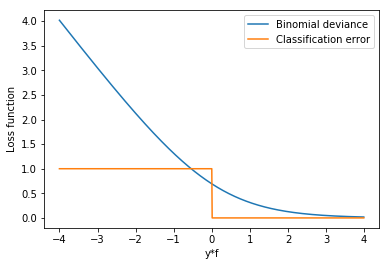

In [0]:
# Plot the logistic regression loss function (un upper bound of the classfication error)
f = np.arange(-4,4,0.01)
y = 1
l_w = np.log(1+ np.exp(f))-y*f
plt.figure()
plt.plot(y*f,l_w, label='Binomial deviance')


# Classification error
e_class = np.zeros(f.shape)
e_class[y*f<0] =1
plt.plot(y*f,e_class, label='Classification error')

plt.legend()
plt.xlabel('y*f')
plt.ylabel('Loss function')

plt.show()

## Extensions of the LR model

2.3. **Regularized versions**

**Regularized Logistic Regression**: we can add a regularization term over the previous cost function to avoid overfitting problems:

* L2 regularization:

$$ \bf w^* = \displaystyle \underset{{\bf w}}{\operatorname{min}} \sum_{i=1}^N \left\lbrace   \log \left( 1+ \exp({\bf w}^T {\bf x}^{(i)})\right) \right\rbrace  -y^{(i)} ({\bf w}^T {\bf x}^{(i)}) + C \Vert {\bf w} \Vert_2^2$$

* L1 regularization:

$$ \bf w^* = \displaystyle \underset{{\bf w}}{\operatorname{min}} \sum_{i=1}^N \left\lbrace  \log \left( 1+ \exp({\bf w}^T {\bf x}^{(i)})\right) \right\rbrace  -y^{(i)} ({\bf w}^T {\bf x}^{(i)}) + C \Vert {\bf w} \Vert_1$$

In general, most LR implementations are using the L2 regularized version. Only in case a feature selection is desired, the L1 regularization is prefered.

2.4 **No -linear RL**: as in linear regression models, we can obtain a non-linear version of the LR model by applying a polynomial expansion of the input data.

### Exercise 2

Analize the LR performance:
1. Compute the test accuracy of the L2-LR model. Use a 10-fold CV process to adjust the value of C (you can explore 10 values of C logarithmically spaced from 0.001 to 1000)
2. Plot the classification boundary.
3. Can we improve its performance with a 2-degree polynomical expansion?

To complete this exercise, you can use the [*sklearn LR implementation*](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html),  the [GridSearchCV( )](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) function. Besides, next cell includes an extension of previous function plot_boundary(), called plot_boundary_poly(), which adapts the previous code to be used with ploynomial data extensions.

In [0]:
# Plot the decision boundary
import matplotlib.pyplot as plt

def plot_boundary_poly(clf, X, Y, plt, transformer, polynomial_features):
    """Plot the classification regions for a given classifier.

    Args:
        clf: scikit-learn classifier object.
        X (numpy dnarray): training or test data to be plotted (number data x number dimensions). Only first two dimensions are plotted
        Y (numpy dnarray): labels of the training or test data to be plotted (number data x 1).
        plt: graphic object where you wish to plot     
        transformer: transformer class of sklearn used to normalized the data (the object has already been fitted)
        polynomial_features: polynomial_features class of sklearn used to create a polynomial extension of the data (the object has already been fitted)
   
    """

    plot_colors = "brymc"
    plot_step = 0.02
    n_classes = np.unique(Y).shape[0]
    # Plot the decision regions
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    
    X_plot = np.c_[xx.ravel(), yy.ravel()]
    X_plot_pol = polynomial_features.transform(X_plot)
    X_plot_pol =  transformer.transform(X_plot_pol)
    
    Z = clf.predict(X_plot_pol)
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired)

    plt.axis("tight")
    
    

#### SOLUTION 2.1

In [0]:
# <SOL>

# Logistic regression
from sklearn.linear_model import LogisticRegression

rang_C = np.logspace(-3, 3, 10)
tuned_parameters = [{'C': rang_C}]
nfold = 10

# Train a LR model and adjust by CV the parameter C
clf_LR  = GridSearchCV(LogisticRegression(solver='lbfgs', multi_class = 'auto'),
                   tuned_parameters, cv=nfold, iid=True)
clf_LR.fit(X_train, Y_train)
acc_test_LR=clf_LR.score(X_test,Y_test)

print("The test accuracy is %2.2f" %(100*acc_test_LR))

# </SOL>

The test accuracy is 88.33


#### SOLUTION 2.2

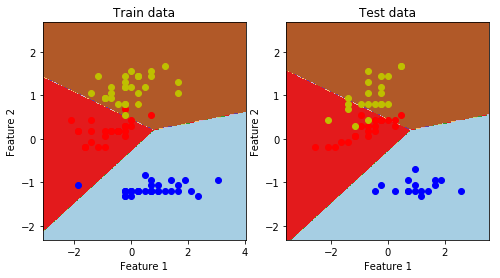

In [0]:
# <SOL>

plt.figure(figsize=(8, 4))
# Plot classification boundary over training data
plt.subplot(1,2,1)
plot_boundary(clf_LR , X_train, Y_train, plt)
plt.title ('Train data')

#  Plot classification boundary over test data
plt.subplot(1,2,2)
plot_boundary(clf_LR , X_test, Y_test, plt)
plt.title ('Test data')


plt.show()

# </SOL>

#### SOLUTION 2.3

The test accuracy with a 2 degree polynomial extension is 90.00


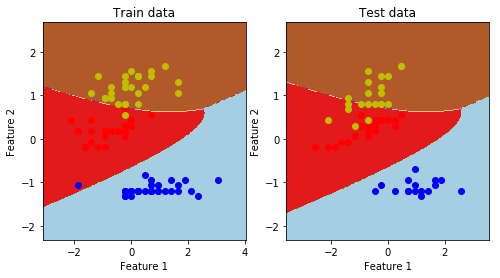

In [0]:
# <SOL>

from sklearn.preprocessing import PolynomialFeatures


n_degree = 2

# Select id_feat and create polynomial version of training and test data
Ntr = X_train.shape[0]
Ntst = X_test.shape[0]

# We are not using the columns of ones anymore
polynomial_features = PolynomialFeatures(degree=n_degree, include_bias=False)

X_train_pol = polynomial_features.fit_transform(X_train)
X_test_pol = polynomial_features.transform(X_test)


# Data normalization
transformer = StandardScaler().fit(X_train_pol)  # fit() learns mean and std

X_train_pol = transformer.transform(X_train_pol)
X_test_pol =  transformer.transform(X_test_pol)


# Compute Ridge Regression solution
clf_LR  = GridSearchCV(LogisticRegression(solver='lbfgs', multi_class = 'auto', max_iter = 500),
                 tuned_parameters, cv=nfold, iid=True)
clf_LR.fit(X_train_pol, Y_train) 


# Evaluate train and test error
acc_train_LR=clf_LR.score(X_train_pol, Y_train)
acc_test_LR=clf_LR.score(X_test_pol, Y_test)
  
print("The test accuracy with a 2 degree polynomial extension is %2.2f" %(100*acc_test_LR))


# Plot the boundaries

plt.figure(figsize=(8, 4))

# Plot classification boundary over training data
plt.subplot(1,2,1)
plot_boundary_poly(clf_LR, X_train, Y_train, plt, transformer, polynomial_features)
plt.title ('Train data')

#  Plot classification boundary over test data
plt.subplot(1,2,2)
plot_boundary_poly(clf_LR, X_test, Y_test, plt, transformer, polynomial_features)
plt.title ('Test data')


plt.show()

# </SOL>

# 3. Decision Trees

1. **An example**

<img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/Classification/TREE_1.jpg" width="48%" > <img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/Classification/TREE_2.jpg" width="48%"> 


2. **Training a decision tree** 

* Inputs: $ \left\lbrace {\bf x}^{(i)} \right\rbrace_{i=1}^N \in \Re^D$ and $ \left\lbrace y^{(i)} \right\rbrace_{i=1}^N \in \{0,1, \ldots, M-1\} $.

* for $d=1:D$                                                             \# For each feature
  * for $u_{d,i} \in$ {all values of $x_d$}            \# Explore threshold values
    * The node splits the data: 
    
        $X_{\rm left}=\left\lbrace {\bf x}^{(i)}, y^{(i)} \right\rbrace_{i \in S_L}$, where $S_L$ is the set of data with $x_d<u_{d,i}$
        
        $ X_{\rm right}=\left\lbrace {\bf x}^{(i)}, y^{(i)} \right\rbrace_{i \in S_R}$, where $S_R$ is the set of data with $x_d>u_{d,i}$
    
    * Evaluate the impurity of this split as
    
        $ G(u_{d,i}) = \displaystyle \frac{n_{\rm left}}{N} g(X_{\rm left}) + \frac{n_{\rm right}}{N} g(X_{\rm right}) $
    
         where $ g(X) $ is the index Gini defined as :
    
       $ g(X) = \displaystyle \sum_{m=0}^{M-1} P_m \left( 1- P_m\right) $
        
		 being $P_m$ the fraction of items classified in the class $m$.
		
* Select threshold ($u_{d,i}$) and feature ($x_d$) minimizing $G(u_{d,i})$
* Split the data according to $x_d$ and threshold $u_{d,i}$
* Apply these steps recursively  to generate the following nodes.

3. **Some comments**
* Note that the tree training does not minimize any cost function (any bound over the classification error); however, after the training, each tree leaf has computed the posterior class probabilities and the Gini index tries that these probabilities are close to 0 or 1. That is,  the  minimization of Gini index aims at getting leaves ``pure enough''.
* This model can be easily extended to regression problems using as $ g(X) $ function the mean square (or absolute) error.
* The resulting classifier is easy to understand and to interpret 
*  We do not need data preprocessing and can easily handle both numerical and categorical data.

**References**

- L. Breiman, J. Friedman, R. Olshen, and C. Stone, “Classification and Regression Trees”, Wadsworth, Belmont, CA, 1984.

- T. Hastie, R. Tibshirani and J. Friedman. “Elements of Statistical Learning”. Chapter 9: ''Additive Models, Trees, and Related Methods''. Springer, 2009.



### Exercise 3.1
**Tree performance analysis**

Compute the test accuracy of a tree. For now, do not cross validate any parameter and use the default values.

To complete this exercise, you can use the [*sklearn Decision Tree Classifier*](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier). Besides, the following cell code provides you the code to show the structure of the trained decision tree. To use it, you only have to create an object called *clf_tree* with the DecisionTreeClassifier of sklearn, fit it over the training data and run the provided code. 

#### SOLUTION 3.1

In [0]:
# <SOL>

from sklearn import tree
clf_tree = tree.DecisionTreeClassifier()
clf_tree.fit(X_train, Y_train)
acc_tree=clf_tree.score(X_test,Y_test)
print("The test accuracy of the decision tree is %2.2f" %(100*acc_tree))

# </SOL>

The test accuracy of the decision tree is 91.67


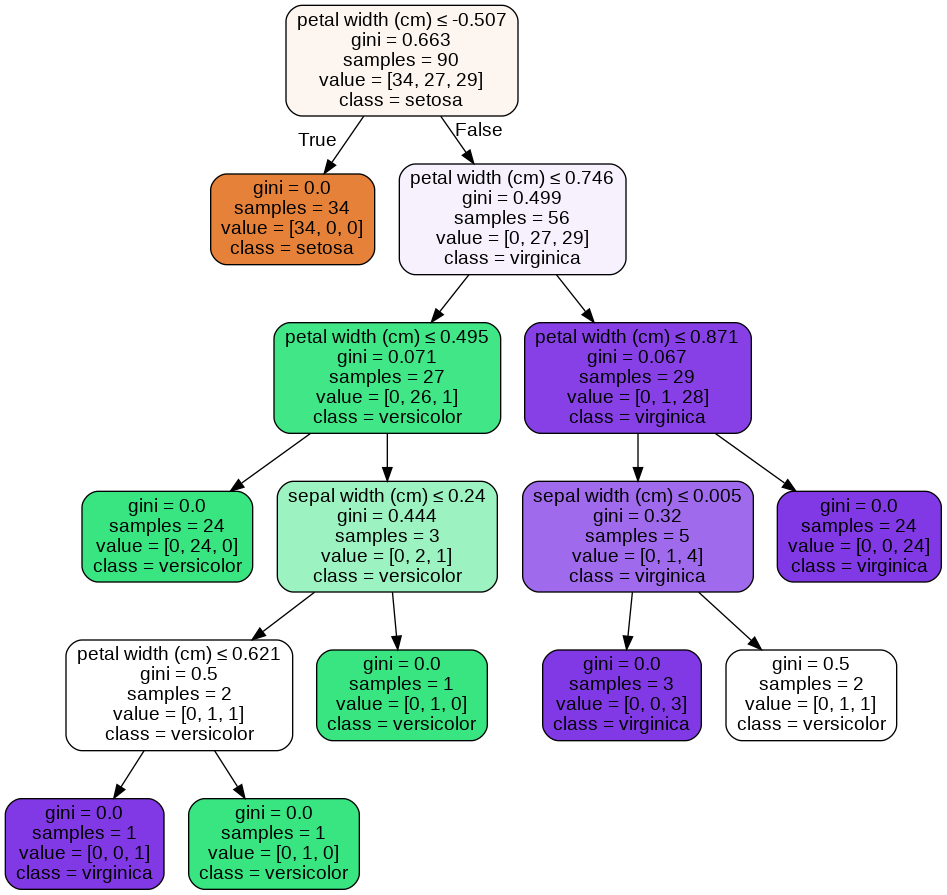

In [0]:
# Code to plot the tree structure

import pydotplus 
from IPython.display import Image  
dot_data = tree.export_graphviz(clf_tree, out_file=None, 
                         feature_names=[iris.feature_names[i] for i in sel_feat],  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

### Exercise 3.2

**Plot the decision boundary**

Use the function plot_boundary(), used in Section 1, to plot the classification boundary of the decision tree. Then, try to answer the following questions:
1. Why do you think that the classification boundary is a combination of vertical and horizontal lines?
2. Do you think the classification boundary is smooth or does it change abruptly? What do you think might be the reason?

#### SOLUTION 3.2

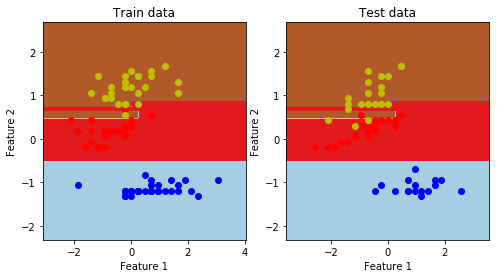

In [0]:
# <SOL>

plt.figure(figsize=(8, 4))

# Plot classification boundary over training data
plt.subplot(1,2,1)
plot_boundary(clf_tree , X_train, Y_train, plt)
plt.title ('Train data')

#  Plot classification boundary over test data
plt.subplot(1,2,2)
plot_boundary(clf_tree , X_test, Y_test, plt)
plt.title ('Test data')
plt.show()

# </SOL>

### Exercise 3.3
**Preventing overfitting problems**

Decision trees can create very complex structures that do not generalize, causing overadjustment problems. This is mainly due to the fact that, as the depth of the tree increases, we divide the samples that arrive at each node and the nodes of the deepest branches have very few samples to learn. To avoid this effect, we can control two parameters:
* **The depth of the tree**. This can be controlled with the parameter *max_depth*. Note that if we have a tree depth of $P$ and in each node the training data are divided in two equal sets, the last nodes would have $N/2^P$ samples. So, according to the number of samples we can set a maximum depth.
* **The minimum number of samples required to divide a node**. This can be set with the parameters *min_samples_split* (the minimum number of samples required to split an internal node) or *min_samples_leaf* (the minimum number of samples required to be at a leaf node).

Train again the previous decision tree and plot its boundary for different values of these parameters.

#### SOLUTION 3.3

The test accuracy of the decision tree is 91.67


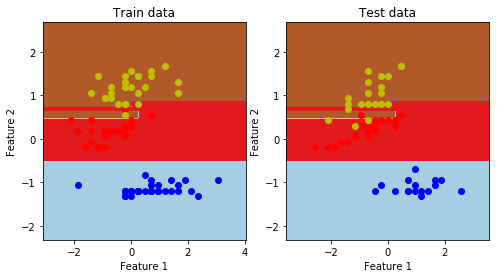

In [0]:
# <SOL>

from sklearn import tree
clf_tree = tree.DecisionTreeClassifier(max_depth=5) # max_depth=2, 4, 5 min_samples_leaf=5, 10
clf_tree.fit(X_train, Y_train)
acc_tree=clf_tree.score(X_test,Y_test)
print("The test accuracy of the decision tree is %2.2f" %(100*acc_tree))


plt.figure(figsize=(8, 4))

# Plot classification boundary over training data
plt.subplot(1,2,1)
plot_boundary(clf_tree , X_train, Y_train, plt)
plt.title ('Train data')

#  Plot classification boundary over test data
plt.subplot(1,2,2)
plot_boundary(clf_tree , X_test, Y_test, plt)
plt.title ('Test data')
plt.show()

# </SOL>

### Other overfitting problems

Decision trees also tend to present overfitting problems when we work in spaces with a high dimensionality and there is a low number of data ($D>>N$), as the tree can easily find features leading to pure nodes over the training data and causing a bad generalization. The only way to alleviate this problem is to increase the number of training data, which is not always possible. 

However, this effect can be mitigated by building sets of trees where each tree uses a subset of input featues, as we will see in the next section. 

## 4. Random Forest

1. **Introduction**

A Random Forest (RF) trains several decision tree classifiers, where each one is trained with different samples and features of the training data, and averages their outputs to improve the final accuracy. The key point of this kind of arquitecture relies in getting a  low correlation among trees (**high diversity**)

	
2. **Training a Random Forest**

* Inputs: $ \left\lbrace {\bf x}^{(i)} \right\rbrace_{i=1}^N\in \Re^D$ and $ \left\lbrace y^{(i)} \right\rbrace_{i=1}^N \in   \left\lbrace 0, 1, ...M-1 \right\rbrace$, number of trees $T$.
* for $t=1:T$                                                             \# For each tree 
  * Sample with replacement from the original data set (boostrap sampling) : $L' (<L)$ data
	* Randomly select $D'(<D)$ features
	* Train a tree optimizing the index Gini with the sub data matrix ($L'\times D'$). 
  

3. **Test data classification**
* Each test data (${\bf x}^*$) is classified by all the tree and we obtain a set of posterior class probabilities. Once the forest is trained, each tree can obtain the posterior class probabilities for a new sample data ($P_t(Y=y|{\bf x^*})$). 
* The forest classification rule is given by:
$$ y^* = \underset{y}{\operatorname{argmax}} {\frac{1}{T} \sum_{t=1}^T P_t(Y=y|{\bf x}^*)}$$
where   $P_t(Y=y|{\bf x}^*)$ is the output class probabilities.

**References**
- L. Breiman, “Random Forests”, Machine Learning, 45(1), 5-32, 2001.


### Exercise 4.1

**RF performance analysis**

Compute the test accuracy of a RF built with 100 decission trees an plot its classification boundary.  

Use the [RandomForestClassifier( )](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) function to train this RF classifier. Set the *max_depth* parameter to 2 and the left remaining parameters with their default values. 

Note that we are working with a two dimensional dataset, so subsampling features does not make sense in the particular example, but at least we can analyze the effect of data subsampling.


#### SOLUTION 4.1

The test accuracy of the RF is 91.67


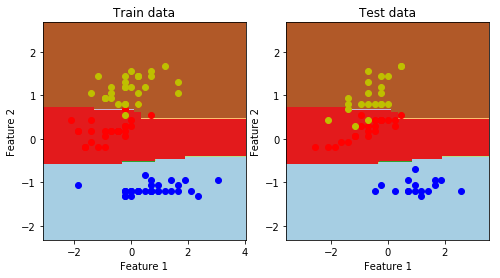

In [0]:
# <SOL>

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

clf_RF  = RandomForestClassifier(n_estimators=200, max_depth=3)
clf_RF.fit(X_train, Y_train)
acc_RF = clf_RF.score(X_test, Y_test)

print("The test accuracy of the RF is %2.2f" %(100*acc_RF))

plt.figure(figsize=(8, 4))
# Plot classification boundary over training data
plt.subplot(1,2,1)
plot_boundary(clf_RF , X_train, Y_train, plt)
plt.title ('Train data')

#  Plot classification boundary over test data
plt.subplot(1,2,2)
plot_boundary(clf_RF , X_test, Y_test, plt)
plt.title ('Test data')
plt.show()

# </SOL>

## Going deeper into the RF

**1. The out-of-bag (OOB) error**

As we know, for the training of each RF tree we only use a subset of samples, so in practice each training sample only participates in the training of some trees. We can use this to obtain an estimate of the error of this sample by classifying it with the set of trees over which it has not participated. If we do this with all the samples and average these errors, we obtain what is known as   The out-of-bag (OOB) error. This allows the RandomForestClassifier to be fit and validated whilst being trained. You can find an example of this validation procedure in this [link](https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html#sphx-glr-auto-examples-ensemble-plot-ensemble-oob-py).



**2. Feature selection with Random Forest**

We can use of forests of trees to evaluate the importance of features on a classification task. Note that the relative rank (or depth) of a feature used by a decision node provides us a relative importance of that feature. Analyzing this information over all the trees of a RF, we can obtain a good estimation of predictive ability of each fature and use it for feature selection. 

The example "[Pixel importances with a parallel forest of trees](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances_faces.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-faces-py)" shows the relative importances of each pixel for a face recognition task. You can check as sklearn RF classifier generates, on the fitted model, a variable 'feature_importances_' which stores these feature importances. This variable is an array with shape (n_features,) whose values are positive and sum to 1.0. The higher the value, the more important is the contribution of the matching feature to the prediction function.







Feature ranking:
1. feature 1 (0.295902)
2. feature 2 (0.208351)
3. feature 0 (0.177632)
4. feature 3 (0.047121)
5. feature 6 (0.046303)
6. feature 8 (0.046013)
7. feature 7 (0.045575)
8. feature 4 (0.044614)
9. feature 9 (0.044577)
10. feature 5 (0.043912)


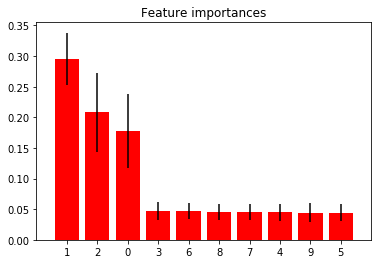

In [0]:
# <SOL>

# EXAMPLE FEATURE SELECTION WITH RF (OUT OF SCOPE)


from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# </SOL>

# 5. Performance evaluation in multiclass problems

### Exercise 5.1

We normally use the .score( ) method of the object classifier to compute the accuracy of a classifier. Use the [metrics.accuracy\_score( )](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) function to calculate the classifier performance and check that you obtain the same value. Note that you need to obtain the classifier output for each test data to able to run the metrics.accuracy\_score() function; review the method .predict() of the classifier object to compute this output.

For the sake of simplicity, you can use a L2-LR classifier setting its C parameter to 100.



#### SOLUTION 5.1

In [0]:
# <SOL>

# Logistic regression
from sklearn.linear_model import LogisticRegression


# Train a LR model with C=100
clf_LR  =LogisticRegression(C=100, solver='lbfgs', multi_class = 'auto')
clf_LR.fit(X_train, Y_train)
# Evaluate its performance with .score()
acc_1 = clf_LR.score(X_test,Y_test)

# Compute the test accuracy by means of accuracy_score()
from sklearn.metrics import accuracy_score
Y_pred = clf_LR.predict(X_test)
acc_2 = accuracy_score(Y_test, Y_pred)

print("The test accuracy provided by score method is  %2.2f%%" %(100*acc_1))
print("The test accuracy provided by accuracy_score function is %2.2f%%" %(100*acc_2))

# </SOL>

The test accuracy provided by score method is  95.00%
The test accuracy provided by accuracy_score function is 95.00%


### Exercise 5.2


**Confusion matrix**

In multiclass problems, the confusion matrix provides the percentage of well classified data over each class. 


<img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/Classification/confusion_matrix.jpg" width="50%"> 


Use the method [metrics.confusion_matrix()](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) to compute the confusion matrix over the performance of above LR classifier. Besides, you can use the following function (plot_confusion_matrix) to depict the object CM returned by the confusion_matrix() method.

#### SOLUTION 5.2

In [0]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(cm.shape[0])
    plt.xticks(tick_marks, np.arange(cm.shape[0]))
    plt.yticks(tick_marks, np.arange(cm.shape[0]))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix
[[16  0  0]
 [ 0 23  0]
 [ 0  3 18]]
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.14285714 0.85714286]]


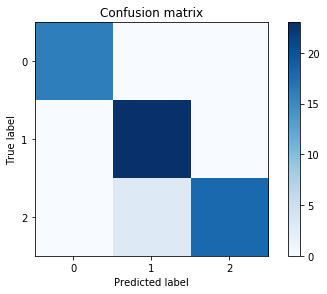

In [0]:
# <SOL>

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(Y_test, Y_pred)
print('Confusion matrix')
print(CM)
CM_norm = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(CM_norm)
   
plt.figure()
plot_confusion_matrix(CM)
plt.show()

# </SOL>

# 6. Perfomance evaluation in binary problems
So far, we have focused on measuring the performance of multiclass problems; in the next  cells we will present some specific assessment methods for this kind of problems.

For this purpose, let's start redefining our multiclass problem as a binary one, just trying to detect the class 'versicolor' from the other two.

In [0]:
# Class 0 and 2  ('setosa' and  'virginica') -> Class 0 ('no versicolor')
# Class 1 ('versicolor') -> Class 1 ('versicolor')
Y_train [Y_train==2] =0
Y_test [Y_test==2] =0

From this new problem definition, we have two possible hypothesis:
* $H=1$ ($Y=1$), the data observations (the length and the width of the sepals and petals)  belong to a 'versicolor' iris.
* $H=0$ ($Y=0$), the data observations (the length and the width of the sepals and petals) do not belong to a 'versicolor' iris.


And our classifier can provide two possible outputs:
* $D=1$ (${\hat Y}=1$), the data is a 'versicolor' iris.
* $D=0$ (${\hat Y}=0$), the data is not a 'versicolor' iris.


So, when a classifiers provides the output for a new observation, we can find four possible events:


| Hypothesis (Y) /Decisions ($\hat Y$) | $D=1$ | $D=0$ |
| --- | --- | --- |
| $H=1$  | True Positive (TP) | False Negative or Missing (FN)|
| $H=0$  |  False Positive or False Alarm (FP)  | True Negative (TN) |

From these events, we can define:
* **The false positive ratio (or false alarm ratio)** is the ratio between the number of negative samples wrongly categorized as positive (false positives) and the total number of actual negative samples:

$$ FPR = \frac{\# FP}{ \#  (H=0)} = \frac{\# (Y=0 ~\& ~{\hat Y}=1) }{\#(Y=0)} $$

* **The false negative ratio (or missing ratio)** is the ratio between the number of positive samples wrongly categorized as negative (false negatives) and the total number of actual positive samples:

$$ FNR = \frac{\# FN}{\#  (H=1)} = \frac{\# (Y=1 ~\& ~{\hat Y}=0) }{\#(Y=1)} $$


* **The true positive or detection ratio**, also known as **recall**, is the ratio between the number of positive samples correctly categorized as positive (true positives) and the total number of actual positive samples:

$$ TPR = 1- FNR = \frac{\# TP}{\#  (H=1)} = \frac{\#(Y=1 ~\& ~{\hat Y}=1) }{\# (Y=1)} $$

* **Precision**, is the number of the number of positive samples correctly categorized as positive (true positives) divided by the total number of samples detected as positives.
$$ Precision = \frac{\# TP}{\#  (D=1)} = \frac{\#(Y=1 ~\& ~{\hat Y}=1) }{\# (~{\hat Y}=1)} $$

Precision and recall parameters can be summarized with the following plot from [Wikipedia](https://en.wikipedia.org/wiki/Precision_and_recall)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png" width="30%"> 




Precision (P) and Recall (R) are usually combined into a single score, called **F-score**:

$$F-score = 2 \frac{P\cdot R}{P+R}$$

Sklearn has the method [precision_recall_fscore_support()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html) to obtain these parameters.



### Exercise 6.1

With the binary problem ('no versicolor' v.s 'versicolor') train a L2-Logistic Regression classifier able to detect the versicolor Iris and evaluate its performance with:
* False Alarm Ratio ($R_{FA}$) 
* Detection Ratio ($R_{D}$)
* Precision, recall and F-score. Compare yours results with those provided by the precision_recall_fscore_support method of sklearn.

It is not needed to adjust the L2-LR  C parameter and you can use a value of 100.


#### SOLUTION 6.1

In [0]:
# <SOL>

#Train a LR model with C=100
clf_LR  =LogisticRegression(C=100, solver='lbfgs')
clf_LR.fit(X_train, Y_train)
# Get the predicted output to compute measurements
f_test = clf_LR.predict(X_test)

Acc =  clf_LR.score(X_test,Y_test)
print('Accuracy: %s' %Acc)

# Performance measurements

# False Alarm
RFA = 100* np.sum((Y_test==0) & (f_test==1))/np.sum(Y_test==0)

print('Percentage of False Alarm Rate: %s' %RFA)

# Detection
RD = 100* np.sum((Y_test==1) & (f_test==1))/np.sum(Y_test==1)

print('Percentage of Detection Rate: %s' %RD)

# Precision, Recall and F-score
Precision = np.sum((Y_test==1) & (f_test==1))/np.sum(f_test==1)
Recall = np.sum((Y_test==1) & (f_test==1))/np.sum(Y_test==1)
Fscore = 2* (Precision  * Recall)/(Precision  + Recall)

print('Precision: %s' %Precision)
print('Recall: %s' %Recall)
print('F-score: %s' %Fscore)

# Precision, Recall and F-score with sklearn
from sklearn.metrics import precision_recall_fscore_support

Precision,Recall,Fscore,support = precision_recall_fscore_support(Y_test, f_test, average='binary')
print('Precision (sklearn): %s' %Precision)
print('Recall (sklearn): %s' %Recall)
print('F-score (sklearn): %s' %Fscore)

# </SOL>

Accuracy: 0.6666666666666666
Percentage of False Alarm Rate: 16.216216216216218
Percentage of Detection Rate: 39.130434782608695
Precision: 0.6
Recall: 0.391304347826087
F-score: 0.47368421052631576
Precision (sklearn): 0.6
Recall (sklearn): 0.391304347826087
F-score (sklearn): 0.47368421052631576


## Modifying the classifier threshold

As we have seen, in multiclass problems, we estimate the most likely class of a new point $\mathbf{x}^*$ as:

\begin{align}
\hat{y}^* =  {\arg \max}_{y\in\{0,1,\ldots, M-1\}} h(\mathbf{x}^*,y)
\end{align}


In binary problems, this  decision can be expressed as:

\begin{align}
h(\mathbf{x}^*,1) \begin{array}{c} \hat{y}^* = 1 \\ \gtrless \\ \hat{y}^* = 0 \end{array} h(\mathbf{x}^*,0)
\end{align}


\begin{align}
\ln \frac{h(\mathbf{x}^*,1)}{h(\mathbf{x}^*,0)} \begin{array}{c} \hat{y}^* = 1 \\ \gtrless \\ \hat{y}^* = 0 \end{array} 0
\end{align}

with this criterion, if $h(\mathbf{x},y)$ is approximating the posterior probability of each class, $P(Y=y|\mathbf{x}^*)$, we are miniziming the probability of error. However, in some cases, we may want to modify the decision threshold $\eta$ by a value greater or lower than zero, 

\begin{align}
\ln \frac{h(\mathbf{x}^*,1)}{h(\mathbf{x}^*,0)} \begin{array}{c} \hat{y}^* = 1 \\ \gtrless \\ \hat{y}^* = 0 \end{array} \eta
\end{align}

In this way, we will penalize with different costs or weigths the different errors (false negatives and /or false positives). 



### Exercise 6.2

So far, to evaluate a classifier, we have always used the output of the sklearn methods by means of the  method .predict() or, directly, the performance given by the method.score(). However, we can use the soft-output of our classfifiers and apply different thresholds over this output to give more weight to either false negatives or false positives.

Use the classifier that you have just trained in Exercise 6.1 and analyze its soft-output by means of the method .decision_function(). Then,

* Apply a threshold of 0 over this output to obtain the classifier output and compute its $R_{FA}$ and $R_{D}$.
* Analyze the behavior of $R_{FA}$ and $R_{D}$ when this threshold is:  $-1, -0.5, 0, 0.5, 1$. 

#### SOLUTION 6.2

In [0]:
# <SOL>
# Get soft-output
o_test = clf_LR.decision_function(X_test)

# Set th = 0
th = 0
f_test_th =  o_test >th

# False Alarm
RFA = 100* np.sum((Y_test==0) & (f_test_th==1))/np.sum(Y_test==0)

print('Percentage of False Alarm Rate: %s' %RFA)

# Detection
RD = 100* np.sum((Y_test==1) & (f_test_th==1))/np.sum(Y_test==1)

print('Percentage of Detection Rate: %s' %RD)
# </SOL>

Percentage of False Alarm Rate: 16.216216216216218
Percentage of Detection Rate: 39.130434782608695


In [0]:
# <SOL>
# We repeat for different thresholds

th_range = [-1, -0.5, 0, 0.5, 1]
RFA_th = []
RD_th = []
for th in th_range:
  f_test_th =  o_test >th

  # False Alarm
  RFA_th.append(100* np.sum((Y_test==0) & (f_test_th==1))/np.sum(Y_test==0))

  # Detection
  RD_th.append(100* np.sum((Y_test==1) & (f_test_th==1))/np.sum(Y_test==1))

print('Explored thresholds: %s' %th_range)
print('Percentage of False Alarm Rate: %s' %RFA_th)
print('Percentage of Detection Rate: %s' %RD_th)
# </SOL>

Explored thresholds: [-1, -0.5, 0, 0.5, 1]
Percentage of False Alarm Rate: [51.351351351351354, 35.13513513513514, 16.216216216216218, 13.513513513513514, 10.81081081081081]
Percentage of Detection Rate: [82.6086956521739, 69.56521739130434, 39.130434782608695, 30.434782608695652, 21.73913043478261]


## A receiver operating characteristic (ROC)

The ROC curve and its area (AUC, Area Under the Curve) are typically used in binary problems to study the output of a classifier independently of the classification threshold. Wikipedia defines the ROC as:

    “A receiver operating characteristic (ROC), or simply ROC curve, is a graphical plot which illustrates the performance of a binary classifier system as its discrimination threshold is varied."
  
To plot this curve we have plot the Detection Ratio vs. the False Alarm ration at various threshold settings. The AUC computes the area under the ROC, in this way, the curve information is summarized in one number. 

### Exercise 6.3

Use the [roc_curve( )](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) and [auc( )](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html) methods to obtain the ROC curve (expressed in terms of the False Positive Rate (FPR) and the True Positive Rate (TPR)) and the AUC value for the classifier designed in Exercise 6.1.


#### SOLUTION 6.3

0.7549941245593419


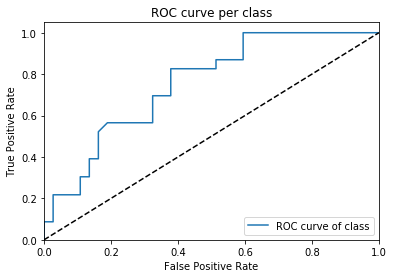

In [0]:
# <SOL>
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class

fpr, tpr, _ = roc_curve(Y_test,o_test)
roc_auc = auc(fpr, tpr)


print (roc_auc )

plt.plot(fpr, tpr, label='ROC curve of class')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve per class')
plt.legend(loc="lower right")
plt.show()
# </SOL>